In [46]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.layers import Activation



In [39]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

In [40]:
print('%d train samples, %d test samples'%(x_train.shape[0], x_test.shape[0]))
print("training data shape: ", x_train.shape, y_train.shape)
print("test data shape: ", x_test.shape, y_test.shape)

50000 train samples, 10000 test samples
training data shape:  (50000, 32, 32, 3) (50000, 1)
test data shape:  (10000, 32, 32, 3) (10000, 1)


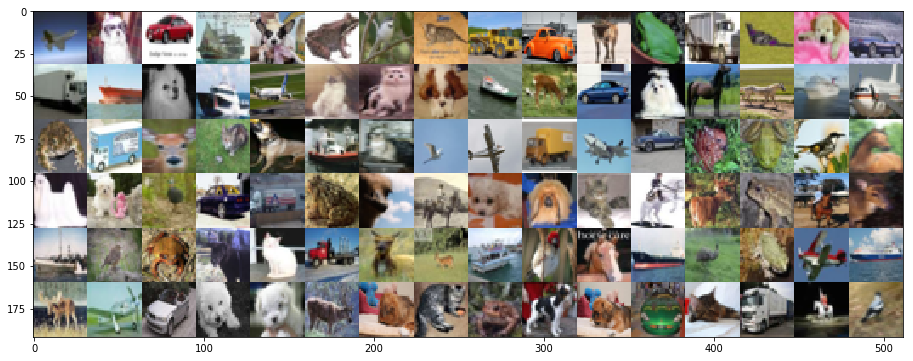

In [41]:
samples = np.concatenate([np.concatenate([x_train[i] for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

In [42]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [43]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
__________

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total para

In [55]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [56]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 46s 926us/step - loss: 1.4764 - acc: 0.4697 - val_loss: 1.2665 - val_acc: 0.5614
Epoch 2/10
50000/50000 [==============================] - 41s 814us/step - loss: 1.1149 - acc: 0.6106 - val_loss: 1.0284 - val_acc: 0.6437
Epoch 3/10
50000/50000 [==============================] - 42s 836us/step - loss: 0.9613 - acc: 0.6626 - val_loss: 0.9592 - val_acc: 0.6714
Epoch 4/10
50000/50000 [==============================] - 52s 1ms/step - loss: 0.8483 - acc: 0.7056 - val_loss: 0.9400 - val_acc: 0.6726
Epoch 5/10
50000/50000 [==============================] - 57s 1ms/step - loss: 0.7581 - acc: 0.7365 - val_loss: 0.9043 - val_acc: 0.6911
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.6621 - acc: 0.7714 - val_loss: 0.8685 - val_acc: 0.7052
Epoch 7/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.5682 - acc: 0.8036 - val_loss: 0.8776 - v

Problem: overfitting

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
__________

In [58]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 46s 917us/step - loss: 1.5890 - acc: 0.4221 - val_loss: 1.3467 - val_acc: 0.5145
Epoch 2/10
50000/50000 [==============================] - 49s 972us/step - loss: 1.2418 - acc: 0.5554 - val_loss: 1.0946 - val_acc: 0.6277
Epoch 3/10
50000/50000 [==============================] - 49s 974us/step - loss: 1.0913 - acc: 0.6137 - val_loss: 1.0321 - val_acc: 0.6455
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0079 - acc: 0.6454 - val_loss: 0.9281 - val_acc: 0.6764
Epoch 5/10
50000/50000 [==============================] - 74s 1ms/step - loss: 0.9343 - acc: 0.6729 - val_loss: 0.8946 - val_acc: 0.6923
Epoch 6/10
50000/50000 [==============================] - 83s 2ms/step - loss: 0.8698 - acc: 0.6936 - val_loss: 0.8586 - val_acc: 0.7043
Epoch 7/10
50000/50000 [==============================] - 87s 2ms/step - loss: 0.8204 - acc: 0.7140 - val_loss: 0.8525 - v

In [60]:
# how'd we do?
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('loss:', loss)
print('accuracy:', accuracy)

loss: 0.7740429040908814
accuracy: 0.7268


predicted = 3, actual = 3


<Container object of 10 artists>

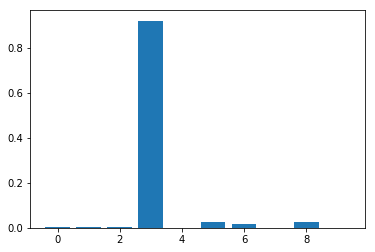

In [68]:
import matplotlib
x_sample = x_test[0].reshape(1,32,32,3)
y_prob = model.predict(x_sample)[0]
y_pred = y_prob.argmax()
y_actual = y_test[0].argmax()

print("predicted = %d, actual = %d" % (y_pred, y_actual))
matplotlib.pyplot.bar(range(10), y_prob)

Review of optimizers